<a href="https://colab.research.google.com/github/karthik-vana/Car-Price-Prediction/blob/main/Car-Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import pickle

In [23]:
# load data
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
# initial inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [25]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [26]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [27]:
# feature engineering
# createing 'Age' & remove unwanted columns
df['current_age'] = 2024
df['Age'] = df['current_age'] - df['Year']
df.drop(['Car_Name', 'current_age','Year'], axis = 1, inplace = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [28]:
# one-hot Encoding for Categorical columns
df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


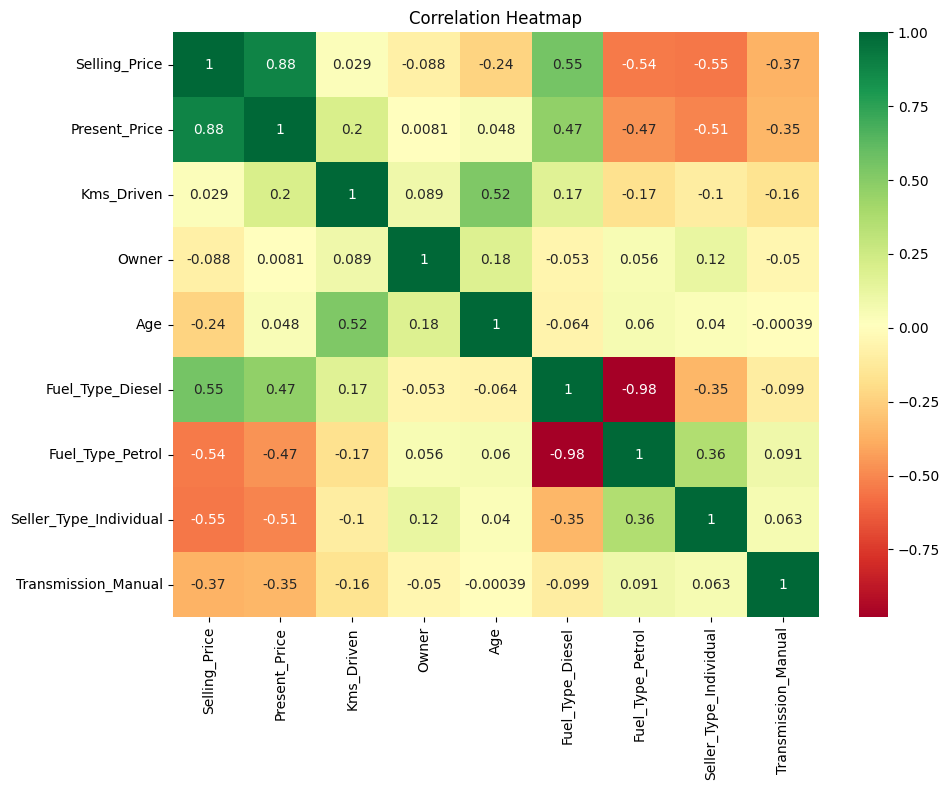

In [56]:
# visualization
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('Correlation_heatmap.png')
plt.show()

In [29]:
# Asigning DEP & IND
X = df.drop('Selling_Price', axis = 1)
y = df['Selling_Price']

In [31]:
X.shape

(301, 8)

In [32]:
y.shape

(301,)

In [33]:
# split into train & test
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [34]:
models = {'Linear_Regression':LinearRegression(),
          'Random_Forest_regression':RandomForestRegressor(),
          'Gradeint_boost_regresiion':GradientBoostingRegressor()
          }

results = {}

In [51]:
for i,model in models.items():
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  mae = metrics.mean_absolute_error(y_test,predictions)
  mse = metrics.mean_squared_error(y_test,predictions)
  r2_score_val = metrics.r2_score(y_test,predictions) # Renamed to avoid conflict with the function name
  results[i] = {
      'MAE': mae,
      'MSE': mse,
      'R2_SCORE': r2_score_val,
      'MODEL': model
  }
print(f'{results}')

{'Linear_Regression': {'MAE': 1.2162256821297004, 'MSE': 3.47880397063787, 'R2_SCORE': 0.848981302489908, 'MODEL': LinearRegression()}, 'Random_Forest_regression': {'MAE': 0.6822180327868858, 'MSE': 1.034529909016394, 'R2_SCORE': 0.9550899215036129, 'MODEL': RandomForestRegressor()}, 'Gradeint_boost_regresiion': {'MAE': 0.565694199382872, 'MSE': 0.741112111412555, 'R2_SCORE': 0.9678275100525551, 'MODEL': GradientBoostingRegressor()}}


In [53]:
best_model_name = max(results, key=lambda k: results[k]['R2_SCORE'])
best_model = results[best_model_name]['MODEL']
print(best_model)

GradientBoostingRegressor()


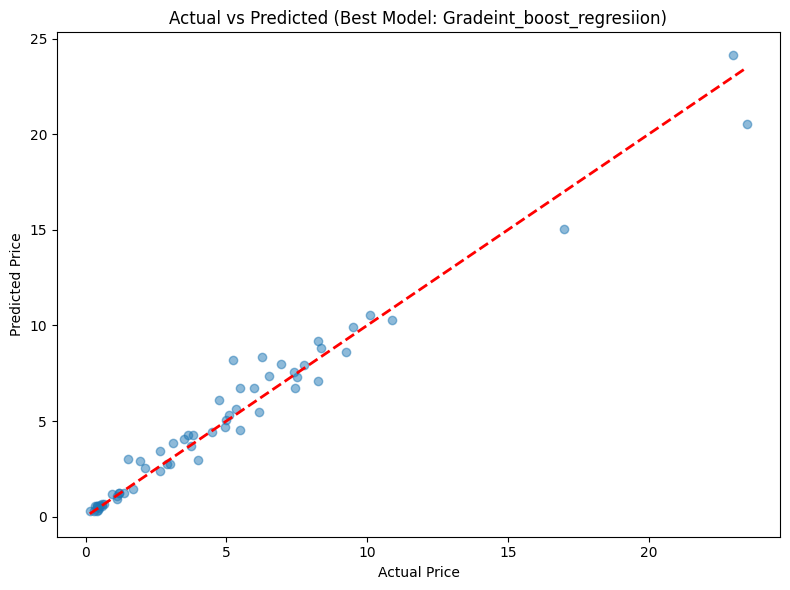

In [58]:
# actual vs predicted

best_preds = best_model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted (Best Model: {best_model_name})')
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')

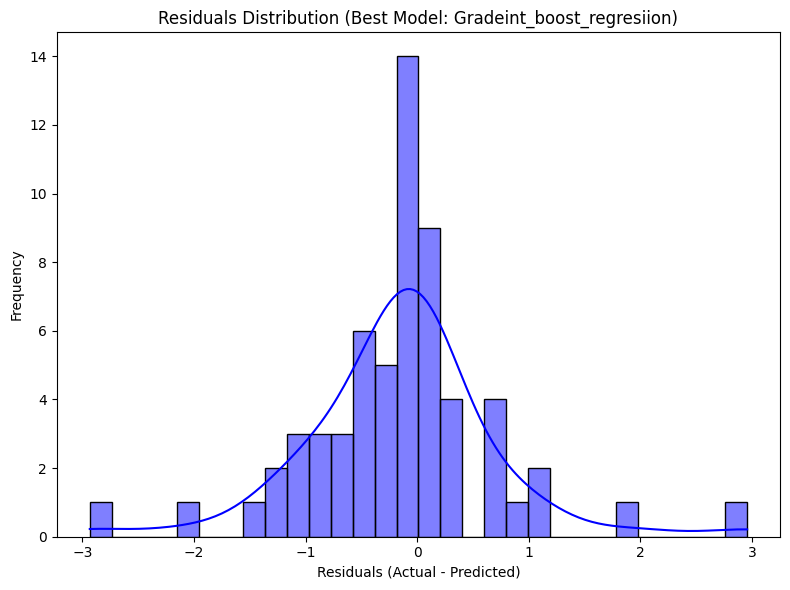

In [59]:


best_preds = best_model.predict(X_test)

residuals = y_test - best_preds

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')

plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title(f"Residuals Distribution (Best Model: {best_model_name})")

plt.tight_layout()
plt.show()


In [55]:
# saving best model
with open('car_price_model.pkl', 'wb') as f:
  pickle.dump(best_model,f)

In [63]:
# Print results for summary
print("--- Model Performance ---")
for name, metrics_dict in results.items():
    print(f"{name}: R2 = {metrics_dict['R2_SCORE']:.4f}, MAE = {metrics_dict['MAE']:.4f}")

print(f"\nBest Model: {best_model_name}")
print("\nFeature Columns used for training:")
print(list(X.columns))


--- Model Performance ---
Linear_Regression: R2 = 0.8490, MAE = 1.2162
Random_Forest_regression: R2 = 0.9551, MAE = 0.6822
Gradeint_boost_regresiion: R2 = 0.9678, MAE = 0.5657

Best Model: Gradeint_boost_regresiion

Feature Columns used for training:
['Present_Price', 'Kms_Driven', 'Owner', 'Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']
